In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
df=pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [4]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
df["Geography"] = df["Geography"].replace({"France": 1, 'Germany': 2,'Spain':3})
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,1,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,3,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,1,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,1,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,3,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,1,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,1,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,1,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,2,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
df["Gender"] = df["Gender"].replace({"Male": 0, 'Female': 1})
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,1,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,3,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,1,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,1,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,3,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,1,0,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,1,0,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,1,1,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,2,0,42,3,75075.31,2,1,0,92888.52,1


In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.columns.tolist()

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [9]:
X=df.drop(["CustomerId","RowNumber","Surname","Exited"],axis=1)
y=df["Exited"]

In [10]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,1,1,42,2,0.00,1,1,1,101348.88
1,608,3,1,41,1,83807.86,1,0,1,112542.58
2,502,1,1,42,8,159660.80,3,1,0,113931.57
3,699,1,1,39,1,0.00,2,0,0,93826.63
4,850,3,1,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,1,0,39,5,0.00,2,1,0,96270.64
9996,516,1,0,35,10,57369.61,1,1,1,101699.77
9997,709,1,1,36,7,0.00,1,0,1,42085.58
9998,772,2,0,42,3,75075.31,2,1,0,92888.52


In [11]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [12]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [13]:
model = Sequential()

In [14]:
model.add(Dense(units=10, activation='relu', input_dim=x_train.shape[1]))
#input layer

In [15]:
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='relu'))
#hidden layer

In [16]:
model.add(Dense(units=1, activation='sigmoid'))
#output layer

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#compilation

In [18]:
model.fit(x_train, y_train, epochs=100, batch_size=64)
#model is fitted

Epoch 1/100
125/125 [==============================] - 2s 943us/step - loss: 0.5556 - accuracy: 0.7958
Epoch 2/100
125/125 [==============================] - 0s 868us/step - loss: 0.4836 - accuracy: 0.7960
Epoch 3/100
125/125 [==============================] - 0s 832us/step - loss: 0.4547 - accuracy: 0.7960
Epoch 4/100
125/125 [==============================] - 0s 846us/step - loss: 0.4381 - accuracy: 0.7960
Epoch 5/100
125/125 [==============================] - 0s 807us/step - loss: 0.4279 - accuracy: 0.7958
Epoch 6/100
125/125 [==============================] - 0s 799us/step - loss: 0.4212 - accuracy: 0.8100
Epoch 7/100
125/125 [==============================] - 0s 838us/step - loss: 0.4160 - accuracy: 0.8223
Epoch 8/100
125/125 [==============================] - 0s 806us/step - loss: 0.4105 - accuracy: 0.8264
Epoch 9/100
125/125 [==============================] - 0s 823us/step - loss: 0.4033 - accuracy: 0.8307
Epoch 10/100
125/125 [==============================] - 0s 812us/step - l

In [19]:
y_pred = model.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy}')


63/63 [==============================] - 0s 610us/step
Accuracy: 0.8595


In [20]:
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[1526   69]
 [ 212  193]]


Accuracy - 85.95%


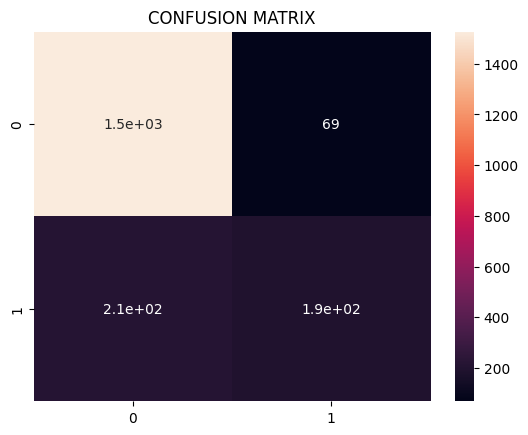

In [21]:
sns.heatmap(conf_matrix,annot = True)
plt.title('CONFUSION MATRIX')
print('Accuracy - {}%'.format(accuracy*100))